<a href="https://colab.research.google.com/github/ahmedebeed555/deeplearning/blob/main/data3_final_updated_DL__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import data


In [4]:
df=pd.read_csv('/content/drive/MyDrive/AI Sessions/data3.csv')
df.head(5)



,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


per_view_all_Data_info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
df.isna().sum()

,0
MOVIES,0
YEAR,644
GENRE,80
RATING,1820
ONE-LINE,0
STARS,0
VOTES,1820
RunTime,2958
Gross,9539


In [7]:
# Check for missing values
print("🔍 MISSING VALUES ANALYSIS:")
print("=" * 80)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

🔍 MISSING VALUES ANALYSIS:


In [8]:
print("Missing values summary:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing values summary:
         Missing Count  Missing Percentage
Gross             9539           95.399540
RunTime           2958           29.582958
RATING            1820           18.201820
VOTES             1820           18.201820
YEAR               644            6.440644
GENRE               80            0.800080


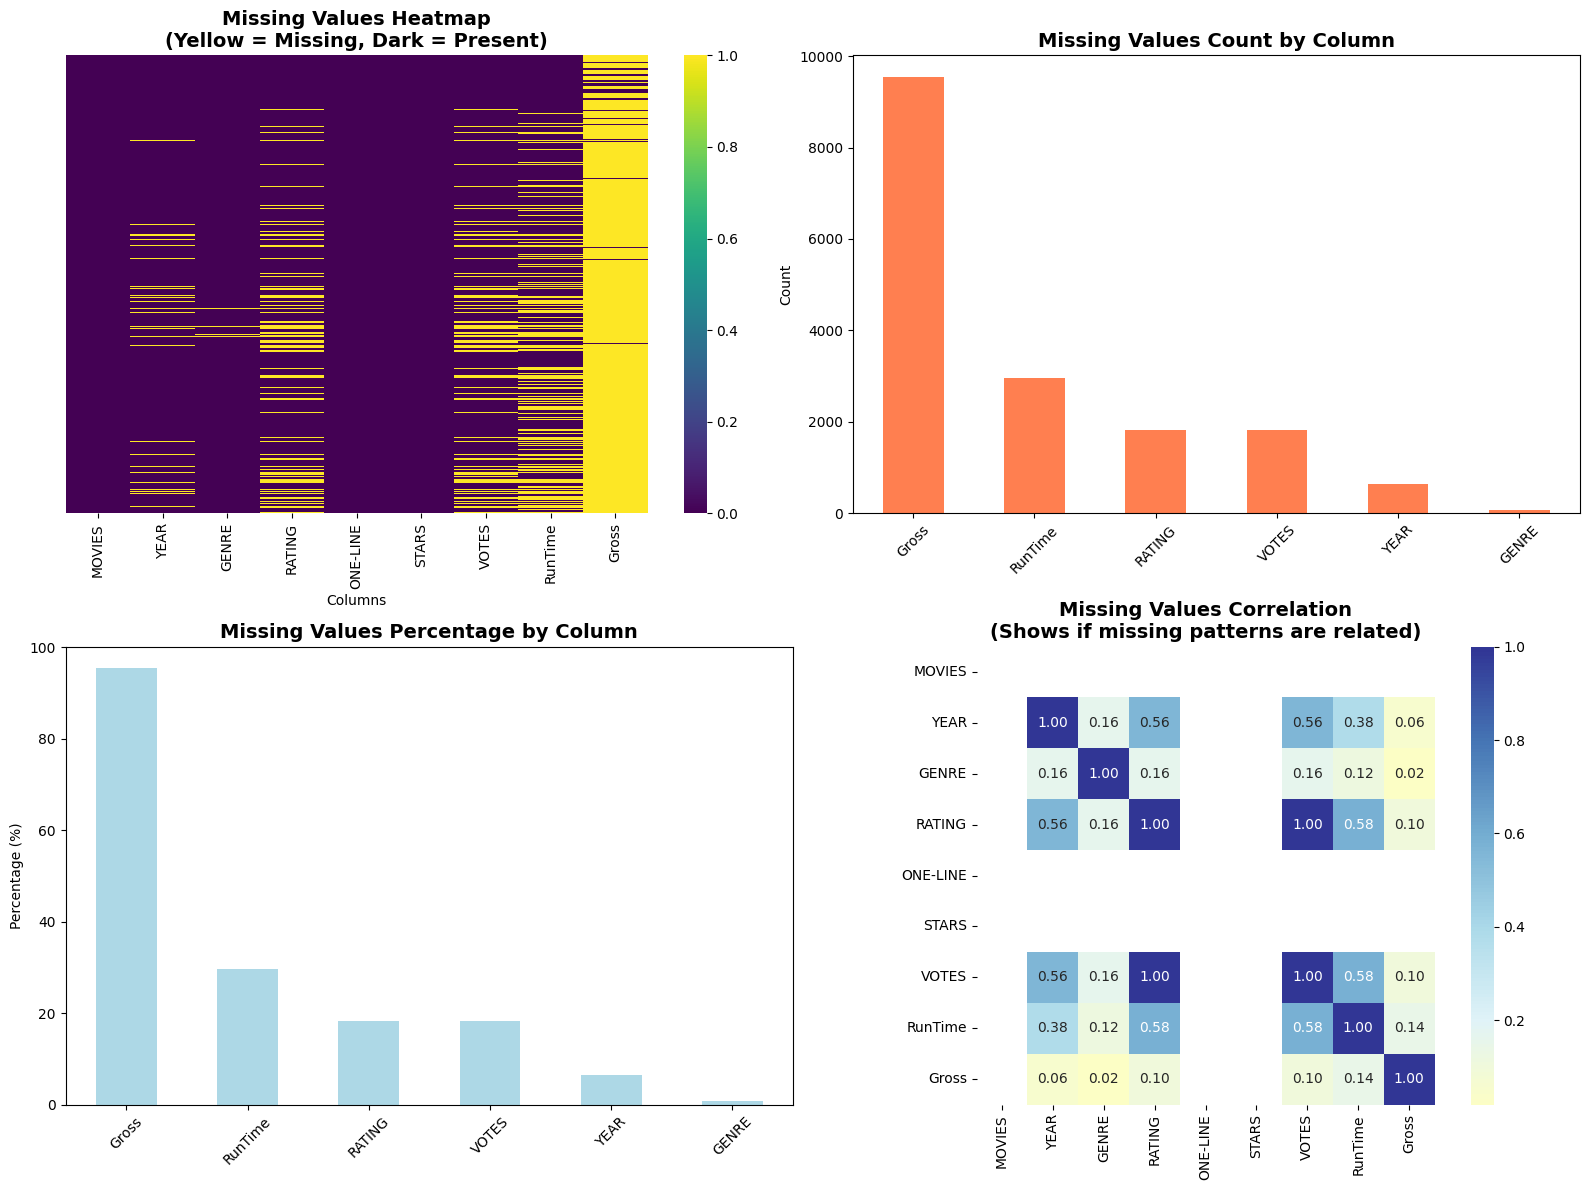


📊 SUMMARY STATISTICS:
Total missing values: 16,861
Percentage of total dataset: 18.74%
Columns with missing values: 6
Complete rows (no missing values): 460 (4.6%)

🔍 MISSING DATA INSIGHTS:
Columns with missing data: ['Gross', 'RunTime', 'RATING', 'VOTES', 'YEAR', 'GENRE']
Rows missing ALL affected columns: 40
Rows missing ANY affected columns: 9539


In [9]:

# Visualize missing values pattern using matplotlib and seaborn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Missing values heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0,0])
axes[0,0].set_title('Missing Values Heatmap\n(Yellow = Missing, Dark = Present)',
                   fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Columns')

# Missing values bar plot
if missing_df[missing_df['Missing Count'] > 0].shape[0] > 0:
    missing_df[missing_df['Missing Count'] > 0]['Missing Count'].plot(kind='bar',
                                                                     ax=axes[0,1],
                                                                     color='coral')
    axes[0,1].set_title('Missing Values Count by Column', fontsize=14, fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].set_ylabel('Count')

    # Missing values percentage
    missing_df[missing_df['Missing Count'] > 0]['Missing Percentage'].plot(kind='bar',
                                                                          ax=axes[1,0],
                                                                          color='lightblue')
    axes[1,0].set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].set_ylabel('Percentage (%)')
else:
    axes[0,1].text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center',
                  transform=axes[0,1].transAxes, fontsize=16)
    axes[0,1].set_title('No Missing Values', fontsize=14, fontweight='bold')
    axes[1,0].text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center',
                  transform=axes[1,0].transAxes, fontsize=16)
    axes[1,0].set_title('No Missing Values', fontsize=14, fontweight='bold')

# Missing values correlation
missing_corr = df.isnull().corr()
sns.heatmap(missing_corr, annot=True, cmap='RdYlBu', center=0, ax=axes[1,1],
           fmt='.2f', square=True)
axes[1,1].set_title('Missing Values Correlation\n(Shows if missing patterns are related)',
                   fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 SUMMARY STATISTICS:")
print("=" * 40)
print(f"Total missing values: {df.isnull().sum().sum():,}")
print(f"Percentage of total dataset: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
print(f"Columns with missing values: {len(missing_df[missing_df['Missing Count'] > 0])}")
print(f"Complete rows (no missing values): {df.dropna().shape[0]:,} ({(df.dropna().shape[0]/len(df))*100:.1f}%)")

# Additional insights about missing data patterns
if df.isnull().sum().sum() > 0:
    print(f"\n🔍 MISSING DATA INSIGHTS:")
    print("=" * 40)
    cols_with_missing = missing_df[missing_df['Missing Count'] > 0].index.tolist()
    print(f"Columns with missing data: {cols_with_missing}")

    # Check if missing values occur together
    if len(cols_with_missing) > 1:
        missing_together = df[cols_with_missing].isnull().all(axis=1).sum()
        print(f"Rows missing ALL affected columns: {missing_together}")

        missing_any = df[cols_with_missing].isnull().any(axis=1).sum()
        print(f"Rows missing ANY affected columns: {missing_any}")
else:
    print("\n🎉 No missing values detected in the dataset!")

In [10]:
df_clean=df.copy()
df_clean['GENRE'] = df_clean['GENRE'].astype(str).str.replace(r'[^\w\s]', ' ', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip().str.split().apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df_clean['STARS'] = df_clean['STARS'].astype(str).str.replace(r'[^\w\s]', ' ', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip().str.split().apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
if df_clean['STARS'].isna().sum() > 0:
    df_clean = df_clean.dropna(subset=['STARS'])
df_clean['MOVIES']=df_clean['MOVIES'].drop


In [11]:

df_main_col=pd.DataFrame(df_clean,columns=['GENRE','Gross','VOTES','RATING','RunTime'])
df_scandry_col=pd.DataFrame(df_clean,columns=['YEAR','STARS'])
df_scandry_col['YEAR'].isna().sum()
df_scandry_col['YEAR']=df_scandry_col['YEAR'].astype(str)
df_scandry_col['YEAR']=df_scandry_col['YEAR'].str.extract('(\d{4})')
df_scandry_col['YEAR']=pd.to_numeric(df_scandry_col['YEAR'],errors='coerce')
df_scandry_col.head(5)

# clean nulls in  years in df_secondary
df_scandry_col = df_scandry_col.dropna(subset=['YEAR'])
df_scandry_col['YEAR'].isna().sum(),df_scandry_col['STARS'].isna().sum()

(np.int64(0), np.int64(0))

In [12]:
import re
import pandas as pd

def extract_start_year(text):
    if pd.isna(text):
        return None

    # Convert to string before stripping
    text = str(text).strip("() ").replace("–", "-")


    match = re.match(r"(\d{4})", text)
    if match:
        return int(match.group(1))
    return None


df_scandry_col['YEAR'] = df_scandry_col['YEAR'].apply(extract_start_year)

df_scandry_col['YEAR'] = pd.to_datetime(df_scandry_col['YEAR'], format='%Y', errors='coerce')


print(df_scandry_col['YEAR'].head(10))

0   2021-01-01
1   2021-01-01
2   2010-01-01
3   2013-01-01
4   2021-01-01
5   2020-01-01
6   2021-01-01
7   2006-01-01
8   2020-01-01
9   2019-01-01
Name: YEAR, dtype: datetime64[ns]


In [13]:
df_main_col

,GENRE,Gross,VOTES,RATING,RunTime
0,Action,NaN,"21,062",6.1,121.0
1,Animation,NaN,"17,870",5.0,25.0
2,Drama,NaN,"885,805",8.2,44.0
3,Animation,NaN,"414,849",9.2,23.0
4,Action,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9993,Drama,NaN,NaN,NaN,NaN
9994,Adventure,NaN,NaN,NaN,NaN
9996,Documentary,NaN,NaN,NaN,NaN
9997,Adventure,NaN,NaN,NaN,NaN


# Runtime VS Rating

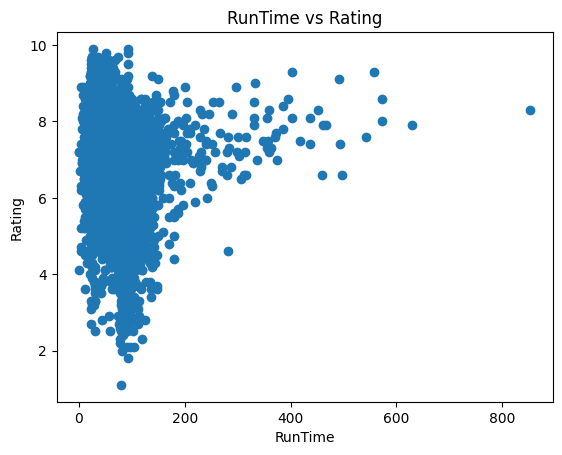

In [14]:
plt.title("RunTime vs Rating")
plt.xlabel("RunTime")
plt.ylabel("Rating")
plt.scatter(df_main_col['RunTime'],df_main_col['RATING'])
plt.show()

# Null Data in VOTES , RunTime , GENRE , RATING and Gross

In [15]:
df_main_col['VOTES'].isna().sum(),df_main_col['RunTime'].isna().sum(),df_main_col['Gross'].isna().sum(),df_main_col['GENRE'].isna().sum(),df_main_col['RATING'].isna().sum()

(np.int64(1448), np.int64(2559), np.int64(9083), np.int64(0), np.int64(1448))

# Remove commas from the 'VOTES' column and convert to numeric


In [16]:
# Remove commas from the 'VOTES' column and convert to numeric
df_main_col['VOTES'] = df_main_col['VOTES'].str.replace(',', '', regex=False)
df_main_col['VOTES'] = pd.to_numeric(df_main_col['VOTES'])

# Fill missing values in 'VOTES' with the mean
if df_main_col['VOTES'].isna().sum() > 0:
    df_main_col['VOTES'] = df_main_col['VOTES'].fillna(df_main_col['VOTES'].mean())

# Fill missing values in 'RATING' with the mean


In [17]:
# Fill missing values in 'RATING' with the mean
if df_main_col['RATING'].isna().sum() > 0:
    df_main_col['RATING'] = df_main_col['RATING'].fillna(df_main_col['RATING'].mean())

# Fill missing values in 'RunTime' with the mean


In [61]:
# Fill missing values in 'RunTime' with the mean
if df_main_col['RunTime'].isna().sum() > 0:
    df_main_col['RunTime'] = df_main_col['RunTime'].fillna(df_main_col['RunTime'].mean())
# Round RunTime
df_main_col['RunTime'] = df_main_col['RunTime'].round()
df_main_col['RunTime']


,RunTime
0,121.0
1,25.0
2,44.0
3,23.0
4,69.0
...,...
9993,69.0
9994,69.0
9996,69.0
9997,69.0


# Check Data After Filling

In [19]:
df_main_col.info(),df_main_col.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 9543 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GENRE    9543 non-null   object 
 1   Gross    460 non-null    object 
 2   VOTES    9543 non-null   float64
 3   RATING   9543 non-null   float64
 4   RunTime  9543 non-null   float64
dtypes: float64(3), object(2)
memory usage: 447.3+ KB


(None,
               VOTES       RATING      RunTime
 count  9.543000e+03  9543.000000  9543.000000
 mean   1.527777e+04     6.920334    68.962915
 std    6.483945e+04     1.123473    40.257476
 min    5.000000e+00     1.100000     1.000000
 25%    2.330000e+02     6.400000    45.000000
 50%    1.382000e+03     6.920334    68.962915
 75%    1.527777e+04     7.600000    87.000000
 max    1.713028e+06     9.900000   853.000000)

# coun df_main_col nulls in all columns


In [20]:
# coun df_main_col nulls in all columns
df_main_col.isnull().sum()

,0
GENRE,0
Gross,9083
VOTES,0
RATING,0
RunTime,0


# coun df_main_col duplicates in all columns


In [21]:
# coun df_main_col duplicates in all columns
df_main_col.duplicated().sum()


np.int64(1376)

# Select only numeric columns for correlation calculation


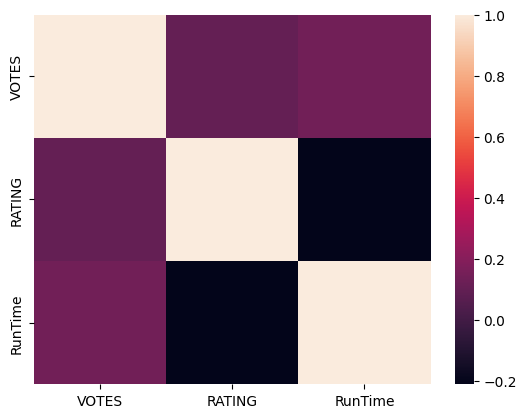

In [22]:
# Select only numeric columns for correlation calculation
numeric_df = df_main_col.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())
plt.show()

# Votes vs Rating

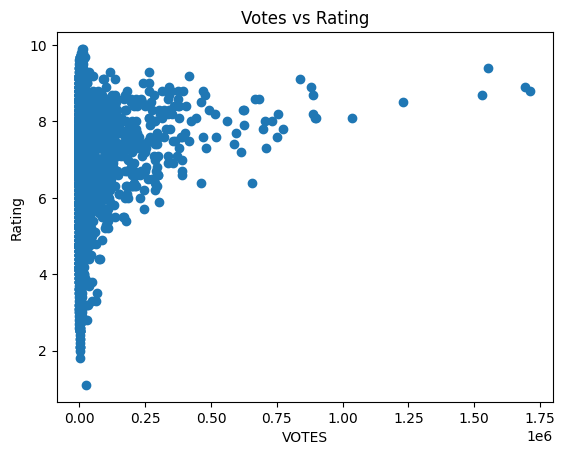

In [23]:
plt.title("Votes vs Rating")
plt.xlabel("VOTES")
plt.ylabel("Rating")
plt.scatter(df_main_col['VOTES'],df_main_col['RATING'])
plt.show()

# Check Data Count

In [24]:
df_main_col.head(5),df_main_col.sample(5),df_main_col.tail(5)

(       GENRE Gross          VOTES    RATING     RunTime
 0     Action   NaN   21062.000000  6.100000  121.000000
 1  Animation   NaN   17870.000000  5.000000   25.000000
 2      Drama   NaN  885805.000000  8.200000   44.000000
 3  Animation   NaN  414849.000000  9.200000   23.000000
 4     Action   NaN   15277.769734  6.920334   68.962915,
             GENRE Gross         VOTES    RATING    RunTime
 4720  Documentary   NaN   1461.000000  6.500000  84.000000
 5366  Documentary   NaN    588.000000  6.800000  39.000000
 7036        Drama   NaN  15277.769734  6.920334  68.962915
 1153        Music   NaN    680.000000  6.900000  44.000000
 7012        Drama   NaN  15277.769734  6.920334  68.962915,
             GENRE Gross         VOTES    RATING    RunTime
 9993        Drama   NaN  15277.769734  6.920334  68.962915
 9994    Adventure   NaN  15277.769734  6.920334  68.962915
 9996  Documentary   NaN  15277.769734  6.920334  68.962915
 9997    Adventure   NaN  15277.769734  6.920334  68.962

In [25]:
if df_main_col['GENRE'].isna().sum() > 0:
    df_main_col = df_main_col.dropna(subset=['GENRE'])


# Check Data in GENRE

In [26]:
df_main_col['GENRE'].isna().sum()

np.int64(0)

# Check

In [27]:
df_main_col.head(5)

,GENRE,Gross,VOTES,RATING,RunTime
0,Action,NaN,21062.000000,6.100000,121.000000
1,Animation,NaN,17870.000000,5.000000,25.000000
2,Drama,NaN,885805.000000,8.200000,44.000000
3,Animation,NaN,414849.000000,9.200000,23.000000
4,Action,NaN,15277.769734,6.920334,68.962915


# Select only numeric columns for correlation calculation


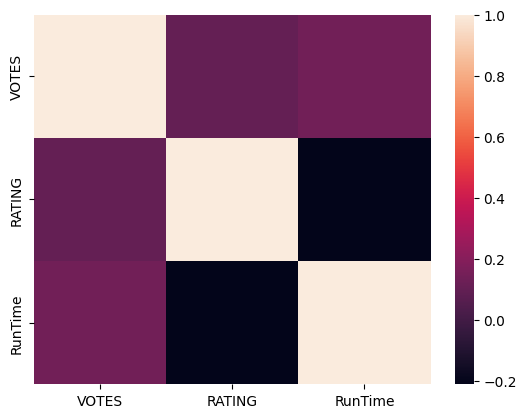

In [28]:
# Select only numeric columns for correlation calculation
numeric_df = df_main_col.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())
plt.show()

#Votes vs RunTime

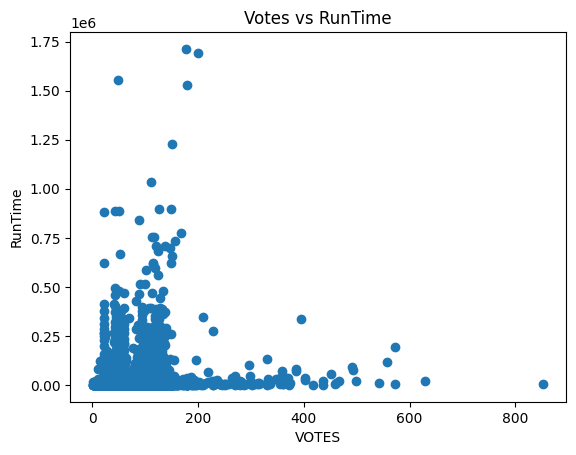

In [29]:
plt.title("Votes vs RunTime")
plt.xlabel("VOTES")
plt.ylabel("RunTime")
plt.scatter(df_main_col['RunTime'],df_main_col['VOTES'])
plt.show()

# Select rows where 'Gross' is NaN


In [30]:
# Select rows where 'Gross' is NaN
gross_nan_rows = df_main_col[df_main_col['Gross'].isna()]

# Display a sample of these rows
if not gross_nan_rows.empty:
    display(gross_nan_rows.sample(min(5, len(gross_nan_rows))))
else:
    print("No missing values in the 'Gross' column.")

,GENRE,Gross,VOTES,RATING,RunTime
1980,Drama,NaN,1086.000000,5.900000,102.000000
3344,Horror,NaN,15277.769734,6.920334,68.962915
2284,Action,NaN,4290.000000,6.100000,103.000000
5396,Animation,NaN,54.000000,7.100000,68.962915
135,Animation,NaN,71904.000000,8.300000,23.000000


# Display Gross Filled Rows

In [31]:
gross_filled_rows = df_main_col[df_main_col['Gross'].notna()]
display(gross_filled_rows.sample(min(5, len(gross_filled_rows))))

,GENRE,Gross,VOTES,RATING,RunTime
743,Adventure,$93.74M,66532.0,7.9,220.0
1012,Comedy,$46.91M,51788.0,6.9,103.0
5106,Documentary,$0.12M,1618.0,8.3,92.0
1456,Animation,$0.45M,28969.0,7.6,118.0
220,Action,$213.52M,390167.0,6.7,112.0


# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric


In [32]:
# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric
gross_filled_rows['Gross'] = gross_filled_rows['Gross'].astype(str).str.replace('[$,M]', '', regex=True)
gross_filled_rows['Gross'] = pd.to_numeric(gross_filled_rows['Gross'])

# Calculate and display describe() and mean()
display(gross_filled_rows['Gross'].describe())
display(gross_filled_rows['Gross'].mean())

,Gross
count,460.000000
mean,43.701870
std,82.423304
min,0.000000
25%,0.150000
50%,6.145000
75%,46.947500
max,504.010000


np.float64(43.701869565217386)

# Save Originally_gross_filled_rows

In [33]:
Originally_gross_filled_rows = df_main_col[df_main_col['Gross'].notna()]

Originally_gross_filled_rows['Gross'].describe()

,Gross
count,460
unique,332
top,$0.01M
freq,22


#Rate Variable = ( GROSS FILLED )mean / ( GROSS FILLED (VOTES)mean * GROSS FILLED (ٌِRATING)mean * GROSS FILLED (RunTime)mean )

In [34]:
rate_gross_per_votes=gross_filled_rows['Gross']/(gross_filled_rows['VOTES']*gross_filled_rows['RATING'])*gross_filled_rows['RunTime']
rate_gross_per_votes.mean(),gross_filled_rows['Gross'].mean()
rate=rate_gross_per_votes.mean()
rate

np.float64(0.006876897737289313)

# Missing Gross Data Reconstruction

In [35]:
df_main_col['Gross'] = df_main_col['Gross'].fillna(rate*df_main_col['VOTES'])
df_main_col['Gross'].isna().sum()

np.int64(0)

# DATA Check

In [36]:
df_main_col.head(5),df_main_col.sample(5),df_main_col.tail(5)

(       GENRE        Gross          VOTES    RATING     RunTime
 0     Action    144.84122   21062.000000  6.100000  121.000000
 1  Animation   122.890163   17870.000000  5.000000   25.000000
 2      Drama    6091.5904  885805.000000  8.200000   44.000000
 3  Animation  2852.874149  414849.000000  9.200000   23.000000
 4     Action    105.06366   15277.769734  6.920334   68.962915,
           GENRE       Gross         VOTES    RATING     RunTime
 1769  Animation  186.178252  27073.000000  7.300000  119.000000
 7656      Drama   105.06366  15277.769734  6.920334   68.962915
 2507      Drama   18.932099   2753.000000  6.100000   87.000000
 5421     Comedy    2.640729    384.000000  5.900000   58.000000
 1443      Drama   56.878821   8271.000000  7.000000  374.000000,
             GENRE      Gross         VOTES    RATING    RunTime
 9993        Drama  105.06366  15277.769734  6.920334  68.962915
 9994    Adventure  105.06366  15277.769734  6.920334  68.962915
 9996  Documentary  105.06366

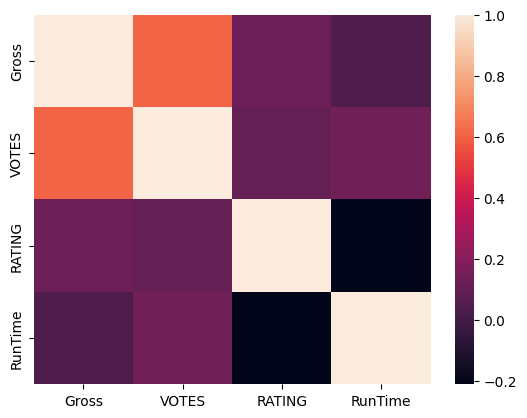

In [54]:
# Heat map of Gross , Voting , RATING , RunTime
numeric_df = df_main_col.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())
plt.show()

# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric


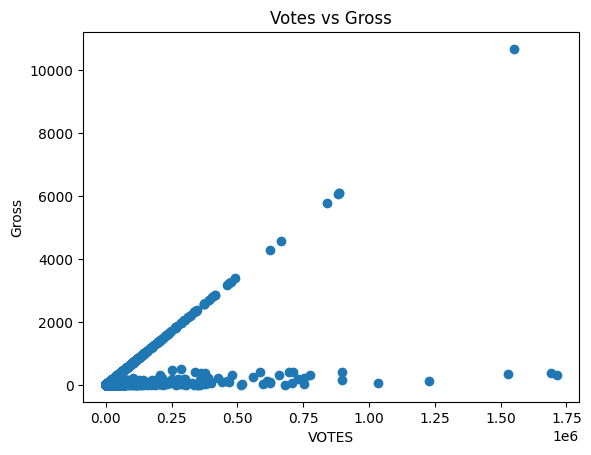

In [37]:
# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric
df_main_col['Gross'] = df_main_col['Gross'].astype(str).str.replace('[$,M]', '', regex=True)
df_main_col['Gross'] = pd.to_numeric(df_main_col['Gross'])

# Fill missing values in 'Gross' using the calculated rate
if df_main_col['Gross'].isna().sum() > 0:
    df_main_col['Gross'] = df_main_col['Gross'].fillna(rate*df_main_col['VOTES'])

plt.title("Votes vs Gross")
plt.xlabel("VOTES")
plt.ylabel("Gross")
plt.scatter(df_main_col['VOTES'],df_main_col['Gross'])
plt.show()

# RATING VS GROSS

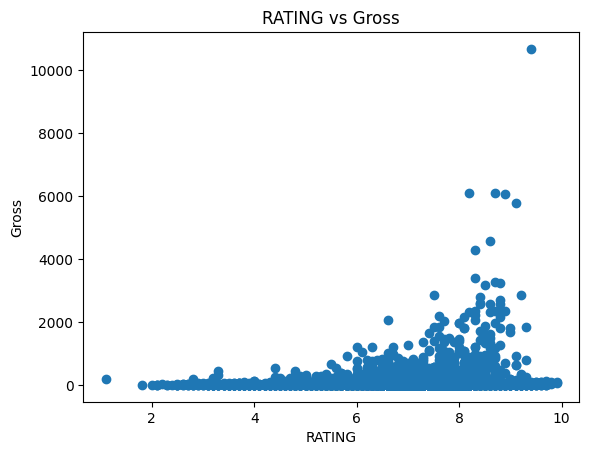

In [38]:
plt.title("RATING vs Gross")
plt.xlabel("RATING")
plt.ylabel("Gross")
plt.scatter(df_main_col['RATING'],df_main_col['Gross'])
plt.show()

#RATING VS Votes

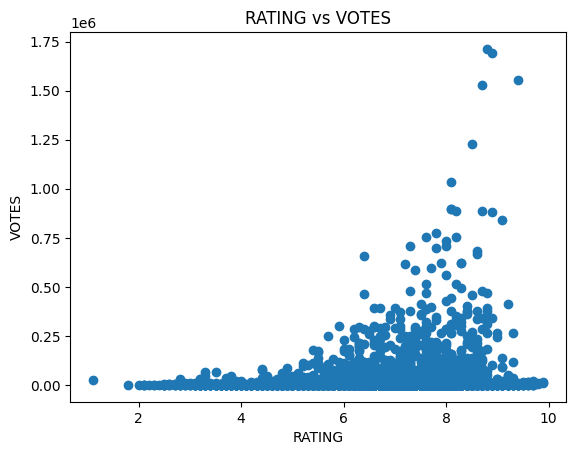

In [39]:
plt.title("RATING vs VOTES")
plt.xlabel("RATING")
plt.ylabel("VOTES")
plt.scatter(df_main_col['RATING'],df_main_col['VOTES'])
plt.show()

#RunTime vs Gross

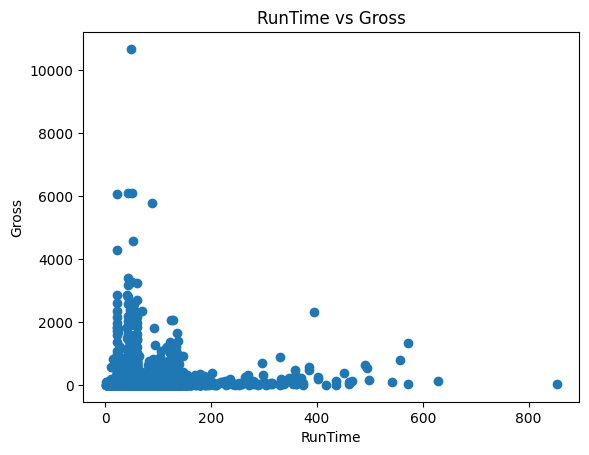

In [40]:
plt.title("RunTime vs Gross")
plt.xlabel("RunTime")
plt.ylabel("Gross")
plt.scatter(df_main_col['RunTime'],df_main_col['Gross'])
plt.show()

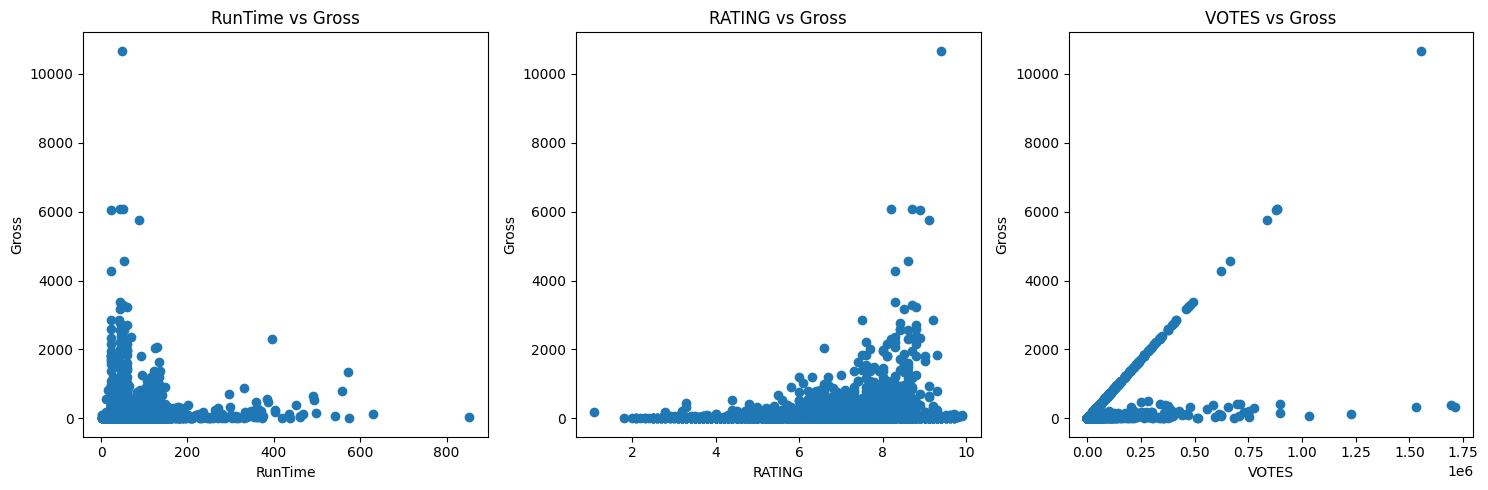

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("RunTime vs Gross")
plt.xlabel("RunTime")
plt.ylabel("Gross")
plt.scatter(df_main_col['RunTime'],df_main_col['Gross'])

plt.subplot(1, 3, 2)
plt.title("RATING vs Gross")
plt.xlabel("RATING")
plt.ylabel("Gross")
plt.scatter(df_main_col['RATING'],df_main_col['Gross'])

plt.subplot(1, 3, 3)
plt.title("VOTES vs Gross")
plt.xlabel("VOTES")
plt.ylabel("Gross")
plt.scatter(df_main_col['VOTES'],df_main_col['Gross'])

plt.tight_layout()
plt.show()

# Import

In [42]:
from sklearn.model_selection import train_test_split
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import kmeans_plusplus
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, f1_score, accuracy_score

#DATA Split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(df_main_col[['VOTES','RATING','RunTime']],df_main_col['Gross'],test_size=0.2,random_state=42)

# Random Forest ML Model

In [44]:
m1=RandomForestRegressor(n_estimators=500,random_state=42)
m1.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

# Prediction

In [45]:
y_pred=m1.predict(x_test)
r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred)


(0.8049811127991477, 16632.03751792827)

#Accuracy

In [46]:
accuracy=m1.score(x_test,y_test)
accuracy

0.8049811127991477

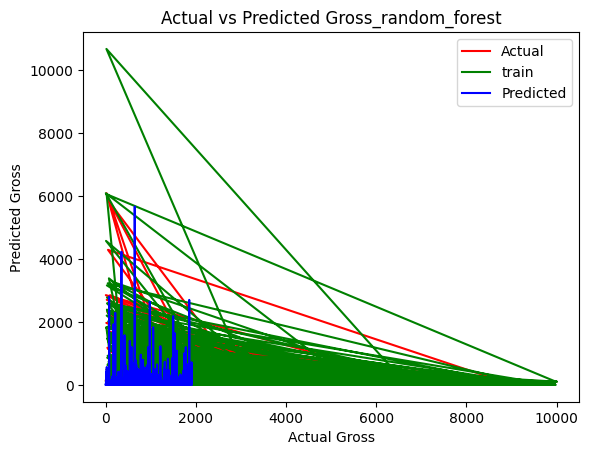

In [47]:
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_train,color='green',label='train')
plt.plot( y_pred, color='blue', label='Predicted')
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross_random_forest")
plt.legend()
plt.show()

#Linear Regression ML Model

In [48]:
from sklearn.linear_model import LinearRegression
m2=LinearRegression()
m2.fit(x_train,y_train)

LinearRegression()

#Predict

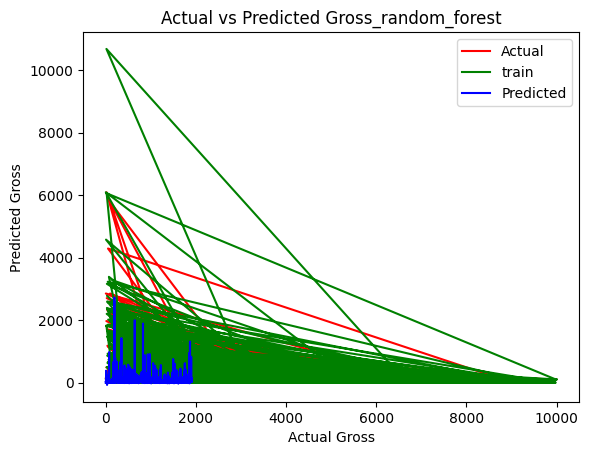

In [49]:
y_pred2 = m2.predict(x_test)
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_train,color='green',label='train')
plt.plot( y_pred2, color='blue', label='Predicted')
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross_random_forest")
plt.legend()
plt.show()

#Accuracy

In [50]:
accuracy=m2.score(x_test,y_test)
accuracy,r2_score(y_test,y_pred2),mean_squared_error(y_test,y_pred)

(0.4505374870168274, 0.4505374870168274, 16632.03751792827)

# Deep Learning Model ReLU 3 input features , layer 6 , layer 6 , output 1 , 200 epoch


Epoch 1/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 60727.9805
Epoch 2/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53648.2148
Epoch 3/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53869.2812
Epoch 4/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70729.7891
Epoch 5/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57133.9805
Epoch 6/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60913.4844
Epoch 7/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 77622.8203
Epoch 8/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52646.5469
Epoch 9/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46387.7656
Epoch 10/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44051.3008
Epoch 11/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43456.2891
Epoch 12/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57453.6562
Epoch 13/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51356.3398
Epoch 14/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

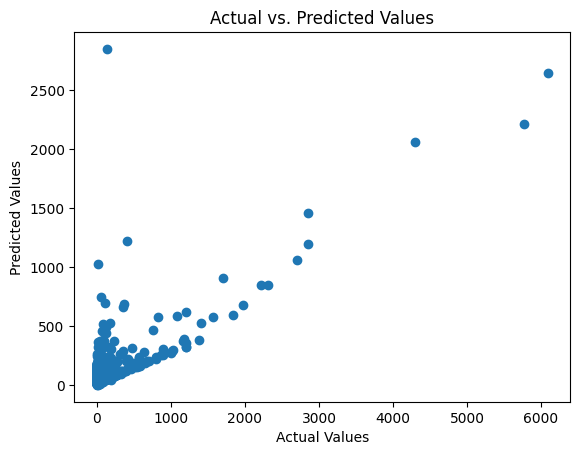

In [51]:
# Deep Learning Model ReLU 3 input features , layer 6 , layer 6 , output 1 , 200 epoch
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# ReLU
model = Sequential()
model.add(Dense(6, input_dim=3, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
# StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#History
history = model.fit(x_train_scaled, y_train, epochs=200, batch_size=32, verbose=1)
# Predict
y_pred = model.predict(x_test_scaled)
# MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#  visulaization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# deep learning model linear regression 3 input layer 6 , layer 6 , 1 output , 200 epoch



Epoch 1/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 68929.4766
Epoch 2/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72215.4297
Epoch 3/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 70796.8984
Epoch 4/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51407.4102
Epoch 5/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62087.7812
Epoch 6/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41043.0547
Epoch 7/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75044.6094
Epoch 8/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42582.1172
Epoch 9/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37661.0664
Epoch 10/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39256.9023
Epoch 11/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68745.7969
Epoch 12/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48816.6641
Epoch 13/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28954.9609
Epoch 14/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

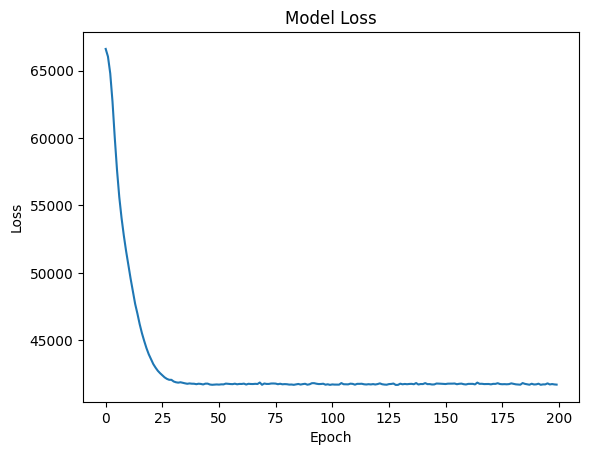

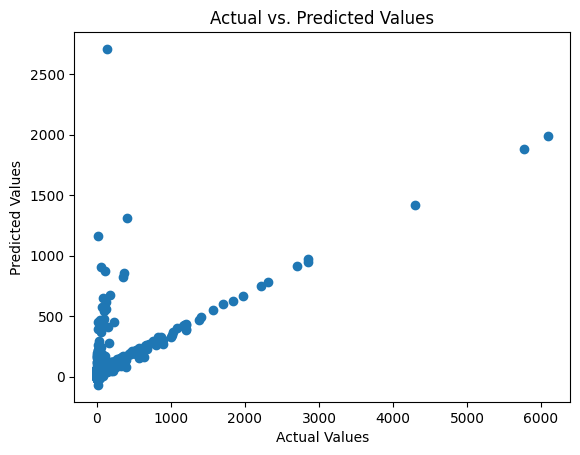

In [52]:
# deep learning model linear regression 3 input layer 6 , layer 6 , 1 output , 200 epoch
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# linear regression

model = Sequential()
model.add(Dense(6, input_dim=3, activation='linear'))
model
model.add(Dense(6, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# history

history = model.fit(x_train_scaled, y_train, epochs=200, batch_size=32, verbose=1)
# Predict
y_pred = model.predict(x_test_scaled)
# MSE , R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# learning curve
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#  visulaization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Animation'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Horror'),
  Text(6, 0, 'Biography'),
  Text(7, 0, 'Adventure'),
  Text(8, 0, 'Documentary'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'Game'),
  Text(11, 0, 'Musical'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Reality'),
  Text(14, 0, 'Family'),
  Text(15, 0, 'Short'),
  Text(16, 0, 'Sci'),
  Text(17, 0, 'Fantasy'),
  Text(18, 0, 'Music'),
  Text(19, 0, 'Romance'),
  Text(20, 0, 'History'),
  Text(21, 0, 'nan'),
  Text(22, 0, 'Film'),
  Text(23, 0, 'Sport'),
  Text(24, 0, 'Talk'),
  Text(25, 0, 'Western'),
  Text(26, 0, 'War'),
  Text(27, 0, 'News')])

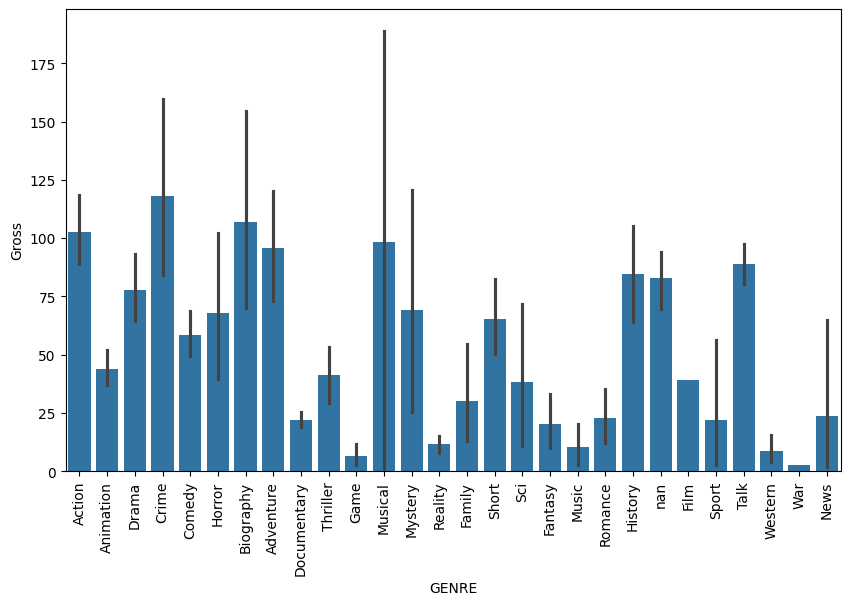

In [55]:
# Plot GENRE and GROSS
plt.figure(figsize=(10, 6))
sns.barplot(x='GENRE', y='Gross', data=df_main_col)
plt.xticks(rotation=90)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82],
 [Text(0, 0, '1.1'),
  Text(1, 0, '1.8'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.1'),
  Text(4, 0, '2.2'),
  Text(5, 0, '2.3'),
  Text(6, 0, '2.4'),
  Text(7, 0, '2.5'),
  Text(8, 0, '2.6'),
  Text(9, 0, '2.7'),
  Text(10, 0, '2.8'),
  Text(11, 0, '2.9'),
  Text(12, 0, '3.0'),
  Text(13, 0, '3.1'),
  Text(14, 0, '3.2'),
  Text(15, 0, '3.3'),
  Text(16, 0, '3.4'),
  Text(17, 0, '3.5'),
  Text(18, 0, '3.6'),
  Text(19, 0, '3.7'),
  Text(20, 0, '3.8'),
  Text(21, 0, '3.9'),
  Text(22, 0, '4.0'),
  Text(23, 0, '

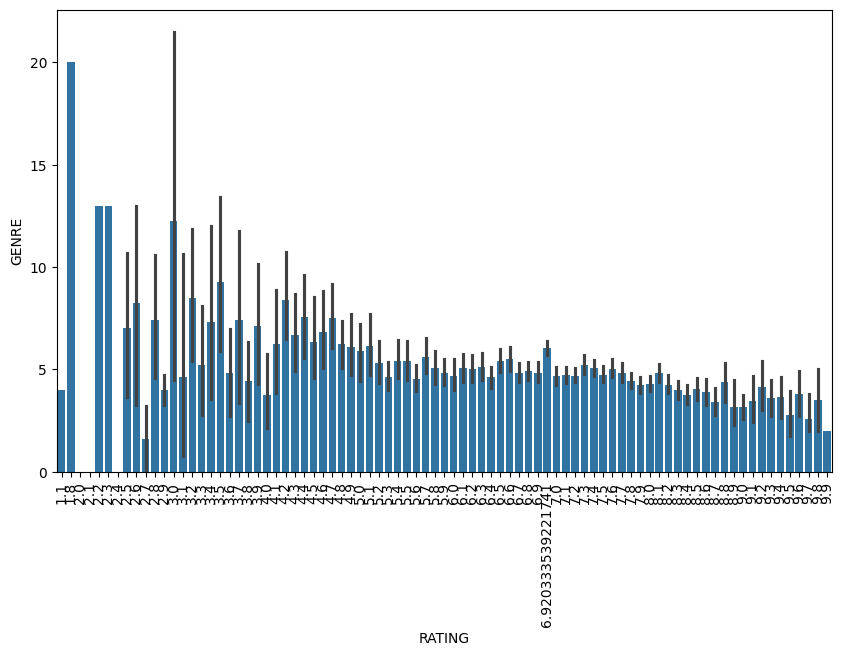

In [64]:
# Plot GENRE and RATING
plt.figure(figsize=(10, 6))
sns.barplot(x='RATING', y='GENRE', data=df_main_col)
plt.xticks(rotation=90)
